# Symbolic Calculations of the Self Replicator Model
(c) This work is licensed under a Creative Commons Attribution License CC-BY 4.0. All code contained herein is licensed under an MIT license



In [1]:
import sympy as sp

## Introduction

## The Governing Dynamics

## Steady-State Solutions

In [65]:
# Define symbols
gamma_max = sp.Symbol(r'{{\gamma_{max}}}')
nu_max = sp.Symbol(r'{{\nu_{max}}}')
phi_R = sp.Symbol(r'{{\phi_R}}')
phi_O = sp.Symbol(r'{{\phi_O}}')
Kd = sp.Symbol(r'{{K_D}}')
cAA = sp.Symbol(r'{{c_{AA}}}')
lam = sp.Symbol(r'\lambda')
t = sp.Symbol('t')
# Define the system 
cAA_eq = (nu_max * (1 - phi_R) / lam) - 1
gamma = gamma_max * cAA_eq / (cAA_eq + Kd)
lam_eq = phi_R * gamma
# lam_soln = sp.solve(lam_eq - lam, lam)
# lam_soln[0]
nu_max_soln = sp.solve(lam_eq - lam, nu_max)
nu_max_soln[0]

-({{\gamma_{max}}}*{{\phi_R}} - {{\nu_{max}}}*{{\phi_R}} + {{\nu_{max}}})/(2*({{K_D}} - 1)) - sqrt(-4*{{K_D}}*{{\gamma_{max}}}*{{\nu_{max}}}*{{\phi_R}}**2 + 4*{{K_D}}*{{\gamma_{max}}}*{{\nu_{max}}}*{{\phi_R}} + {{\gamma_{max}}}**2*{{\phi_R}}**2 + 2*{{\gamma_{max}}}*{{\nu_{max}}}*{{\phi_R}}**2 - 2*{{\gamma_{max}}}*{{\nu_{max}}}*{{\phi_R}} + {{\nu_{max}}}**2*{{\phi_R}}**2 - 2*{{\nu_{max}}}**2*{{\phi_R}} + {{\nu_{max}}}**2)/(2*(1 - {{K_D}}))

In [66]:
Nu = nu_max * (1 - phi_R)
Gamma = gamma_max * phi_R
lam = (Nu + Gamma - sp.sqrt((Nu + Gamma)**2 - 4 *(1-Kd) * (Nu*Gamma))) / (2 * (1- Kd))
lam

({{\gamma_{max}}}*{{\phi_R}} + {{\nu_{max}}}*(1 - {{\phi_R}}) - sqrt(-{{\gamma_{max}}}*{{\nu_{max}}}*{{\phi_R}}*(1 - {{\phi_R}})*(4 - 4*{{K_D}}) + ({{\gamma_{max}}}*{{\phi_R}} + {{\nu_{max}}}*(1 - {{\phi_R}}))**2))/(2 - 2*{{K_D}})

In [67]:
def taylor(function, x0, n, x):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x, i).subs(x, x0))/(sp.factorial(i))*(x - x0)**i
        i += 1
    return p

In [68]:
out = taylor(lam, 0, 2, phi_R)

out.simplify()

(2*{{\nu_{max}}}**2*(-{{\nu_{max}}} + sqrt({{\nu_{max}}}**2)) + {{\phi_R}}**2*(-4*{{\gamma_{max}}}*{{\nu_{max}}}*({{K_D}} - 1) + ({{\gamma_{max}}} - {{\nu_{max}}})**2 - (2*{{\gamma_{max}}}*({{K_D}} - 1) + {{\gamma_{max}}} - {{\nu_{max}}})**2)*sqrt({{\nu_{max}}}**2) - 2*{{\phi_R}}*(2*{{\gamma_{max}}}*{{\nu_{max}}}*(1 - {{K_D}}) - {{\nu_{max}}}*({{\gamma_{max}}} - {{\nu_{max}}}) + ({{\gamma_{max}}} - {{\nu_{max}}})*sqrt({{\nu_{max}}}**2))*sqrt({{\nu_{max}}}**2))/(4*{{\nu_{max}}}**2*({{K_D}} - 1))

In [74]:
dmu_dphiR = sp.diff(lam, phi_R)
opt_phiR = sp.solve(dmu_dphiR, phi_R)
 

In [77]:
nu_soln = sp.solve(opt_phiR[0] - phi_R, nu_max)

In [80]:
nu_soln[0]
Nu = nu_soln[0] * (1 - phi_R)
Gamma = gamma_max * phi_R
new_lam = (Nu + Gamma - sp.sqrt((Nu + Gamma)**2 - 4 *(1-Kd) * (Nu*Gamma))) / (2 * (1- Kd))
new_lam

({{\gamma_{max}}}*{{\phi_R}} + (1 - {{\phi_R}})*(4*{{K_D}}*{{\gamma_{max}}}*{{\phi_R}}**2 - 4*{{K_D}}*{{\gamma_{max}}}*{{\phi_R}} + {{K_D}}*{{\gamma_{max}}} - 2*{{\gamma_{max}}}*{{\phi_R}}**2 - 2*{{\gamma_{max}}}*{{\phi_R}}*sqrt(4*{{K_D}}**2*{{\phi_R}}**2 - 4*{{K_D}}**2*{{\phi_R}} + {{K_D}}**2 - 4*{{K_D}}*{{\phi_R}}**2 + 4*{{K_D}}*{{\phi_R}}) + 2*{{\gamma_{max}}}*{{\phi_R}} + {{\gamma_{max}}}*sqrt(4*{{K_D}}**2*{{\phi_R}}**2 - 4*{{K_D}}**2*{{\phi_R}} + {{K_D}}**2 - 4*{{K_D}}*{{\phi_R}}**2 + 4*{{K_D}}*{{\phi_R}}))/(2*{{\phi_R}}**2 - 4*{{\phi_R}} + 2) - sqrt(-{{\gamma_{max}}}*{{\phi_R}}*(1 - {{\phi_R}})*(4 - 4*{{K_D}})*(4*{{K_D}}*{{\gamma_{max}}}*{{\phi_R}}**2 - 4*{{K_D}}*{{\gamma_{max}}}*{{\phi_R}} + {{K_D}}*{{\gamma_{max}}} - 2*{{\gamma_{max}}}*{{\phi_R}}**2 - 2*{{\gamma_{max}}}*{{\phi_R}}*sqrt(4*{{K_D}}**2*{{\phi_R}}**2 - 4*{{K_D}}**2*{{\phi_R}} + {{K_D}}**2 - 4*{{K_D}}*{{\phi_R}}**2 + 4*{{K_D}}*{{\phi_R}}) + 2*{{\gamma_{max}}}*{{\phi_R}} + {{\gamma_{max}}}*sqrt(4*{{K_D}}**2*{{\phi_R}}

In [81]:
grl = sp.Symbol('\lambda')
out = sp.solve(new_lam - grl, phi_R)

KeyboardInterrupt: 

In [32]:
# Define the symbols
M = sp.Symbol('M')
Mr = sp.Symbol('{{M_R}}')
M0 = sp.Symbol('{{M_0}}')
Mr0 = sp.Symbol(r'{{M_{R,0}}}')
cAA_0 = sp.Symbol(r'{{c_{AA,0}}}')
gamma = cAA / (cAA + Kd)

# Define the fns
M_fn = sp.Function('{{M_f}}')
Mr_fn = sp.Function('{{Mr_f}}')
cAA_fn = sp.Function('{{cAA_f}}')

# Define the system
system = [sp.Eq(M_fn(t).diff(t), gamma * Mr_fn(t)), 
          sp.Eq(Mr_fn(t).diff(t), phi_R * M_fn(t)), 
          sp.Eq(cAA_fn(t).diff(t),  ((M_fn(t) - Mr_fn(t))/M_fn(t)) * nu_max - gamma * (Mr_fn(t) / M_fn(t)) - (cAA_fn(t) / M_fn(t))* M_fn(t))]
ics = {M_fn(0):M0,
       Mr_fn(0):Mr,
       cAA_fn(0):cAA_0}
sys_soln = sp.dsolve(system, [M_fn(t), Mr_fn(t), cAA_fn(t)], ics=ics)

In [27]:
opt_phiRb = sp.diff(lam_soln)

Eq(dCAA_dt(t), {{c_{AA,0}}} - t**2*(-M*{{\nu_{max}}}*({{K_D}} + {{c_{AA}}}) + {{K_D}}*{{M_R}}*{{\nu_{max}}} + {{M_R}}*{{c_{AA}}}*({{\nu_{max}}} + {{c_{AA}}} + 1))/(2*M*({{K_D}} + {{c_{AA}}})))

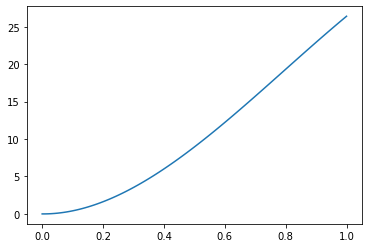

In [63]:
import matplotlib.pyplot as plt
Kd = 0.01
gamma_max = 9.65
nu_max = 3 
phiR_range = np.linspace(0, 1, 100)

lam = ((phiR_range**2) * (gamma_max**2 + nu_max**2)  / (2 * (1 - Kd))) - 2 * gamma_max * phiR_range * (phiR_range**2 + (Kd * nu_max / 2) + gamma_max * phiR_range * nu_max * Kd)

plt.plot(phiR_range, lam)